In [ ]:
#21BAI10030 KUHOO CHANDRA

## DATA MINING CONCEPTS COVERED IN THIS TASK


1.   statistical description of data
2.   exploratory data analysis
3.   data preprocessing
4. data transformation - scaling and encoding
5. data visualization


DATASET:  https://drive.google.com/file/d/1AzGUHzN7zSPRszgpYfYY2gMVQQqULFUK/view?usp=sharing

In [1]:
#import relevant modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

##LOAD DATA


In [3]:
data = pd.read_csv("country_wise_latest-covid 19 1.csv")

In [4]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
data.shape

(187, 15)

## EXPLORATORY ANALYSIS

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [8]:
len(data['Country/Region'].unique())

187

## DATA-PREPROCESSING

**Looking at the mean value of 'Death/100 Recovered' column above we can see that there are outliers distorting the outputs. It also has some NaN values. So to correctly visualize the countries with most deaths per 100 recovered cases we need to preprocess the data**

In [9]:
# calculate the average 'Deaths / 100 Recovered' for each WHO region
avg_by_region = data.groupby('WHO Region')['Deaths / 100 Recovered'].mean().reset_index()

In [10]:
# Define a function to replace outliers and NaNs in the 'Deaths / 100 Recovered' column
def replace_outliers_and_nans(row):
    if pd.isnull(row['Deaths / 100 Recovered']):  # Check for NaN using pandas isnull method
        region_avg = avg_by_region[avg_by_region['WHO Region'] == row['WHO Region']]['Deaths / 100 Recovered'].values
        if len(region_avg) > 0:
            return float(region_avg[0])  # Return the average value for the region
        else:
            return row['Deaths / 100 Recovered']
    elif row['Deaths / 100 Recovered'] == float('inf') or row['Deaths / 100 Recovered'] == 0 or row['Deaths / 100 Recovered'] > 100:
        region_avg = avg_by_region[avg_by_region['WHO Region'] == row['WHO Region']]['Deaths / 100 Recovered'].values
        if len(region_avg) > 0:
            return float(region_avg[0])  # Return the average value for the region
        else:
            return row['Deaths / 100 Recovered']
    else:
        return row['Deaths / 100 Recovered']

# Apply the function to update the values in the 'Deaths / 100 Recovered' column
data['Deaths / 100 Recovered'] = data.apply(replace_outliers_and_nans, axis=1)


In [11]:
column_name = 'Deaths / 100 Recovered'

# Check for NaN values in the specified column
nan_in_column = data[column_name].isnull().any()

# Display whether NaN values exist in the column
if nan_in_column:
    print(f"Column '{column_name}' contains NaN values.")
else:
    print(f"No NaN values found in column '{column_name}'.")


Column 'Deaths / 100 Recovered' contains NaN values.


In [12]:
data['Deaths / 100 Recovered'].unique()

array([ 5.04  ,  5.25  ,  6.17  ,  6.48  , 16.94  ,  4.62  ,  4.21  ,
        2.67  ,  1.79  ,  3.91  ,  1.82  , 12.09  ,  0.39  ,  2.36  ,
        7.45  ,  0.89  , 56.28  ,  7.69  ,  3.38  ,  1.956 , 12.32  ,
        5.96  ,  3.17  ,  4.74  ,  2.17  ,  6.21  ,  5.72  ,  2.05  ,
        0.33  ,  1.42  ,  1.7875,  2.69  ,     nan,  3.82  ,  9.26  ,
        2.87  ,  5.9   ,  6.69  ,  2.13  ,  6.51  ,  3.65  ,  3.01  ,
        0.93  ,  3.53  ,  3.7   ,  2.23  ,  3.26  ,  4.86  ,  1.17  ,
        3.59  , 15.85  , 13.35  ,  6.06  ,  3.32  ,  3.57  ,  4.75  ,
       37.2   ,  1.05  , 12.12  ,  1.74  ,  4.79  ,  0.56  , 14.7   ,
        5.43  ,  0.72  ,  3.24  , 11.05  ,  3.62  , 23.14  , 17.9   ,
        0.55  ,  3.51  ,  8.32  ,  6.24  ,  5.78  ,  7.55  ,  1.75  ,
       17.68  ,  1.4   ,  4.54  ,  1.06  ,  1.08  ,  3.64  ,  4.59  ,
        0.8   ,  6.14  ,  2.97  ,  2.98  ,  9.38  , 11.15  , 11.09  ,
        1.23  ,  4.94  ,  2.32  ,  1.45  ,  6.02  ,  1.44  ,  0.59  ,
        1.35  ,  3.3

In [13]:
# Check for NaN values in the entire DataFrame
nan_values = data.isnull().sum()

# Display columns with NaN values and their counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
Deaths / 100 Recovered    16
dtype: int64


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numeric columns for scaling
numeric_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                   'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
                   'Confirmed last week', '1 week change', '1 week % increase']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numeric columns to scale them between 0 and 1
scaled_data = scaler.fit_transform(data[numeric_columns])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Display the scaled DataFrame
print(scaled_df.head())

   Confirmed    Deaths  Recovered    Active  New cases  New deaths  \
0   0.008450  0.008574   0.013645  0.003478   0.001882    0.009294   
1   0.001135  0.000973   0.001486  0.000707   0.002077    0.005576   
2   0.006518  0.007858   0.010201  0.002831   0.010934    0.007435   
3   0.000209  0.000351   0.000435  0.000018   0.000178    0.000000   
4   0.000219  0.000277   0.000131  0.000237   0.000320    0.000929   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0       0.000534            0.122549                 0.6949   
1       0.001868            0.103291                 0.5625   
2       0.022207            0.145658                 0.6734   
3       0.000000            0.200630                 0.8853   
4       0.000000            0.151261                 0.2547   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                0.085981             0.009262       0.001721   
1                0.089606             0.001085       0.001659   
2    

In [15]:
data.to_csv('countrywise_covid19_cleaned.csv', index=False)

In [16]:
from google.colab import files
files.download('countrywise_covid19_cleaned.csv')

ModuleNotFoundError: No module named 'google'

## DATA VISUALISATION

(-1.1005194267764842,
 1.1028881913779758,
 -1.1105941350807051,
 1.1196696748825816)

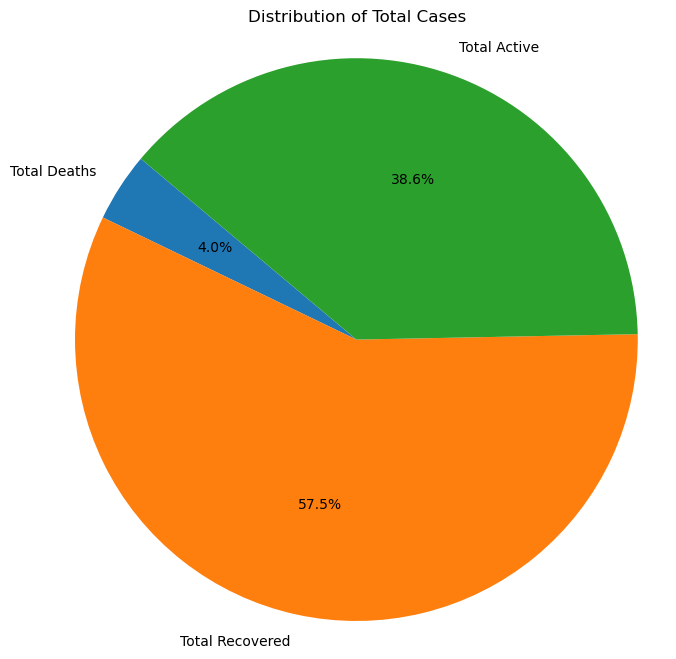

In [17]:
# Summing up the total deaths, recovered, and active cases
total_deaths = data['Deaths'].sum()
total_recovered = data['Recovered'].sum()
total_active = data['Active'].sum()

# Creating labels and values for the pie chart
labels = ['Total Deaths', 'Total Recovered', 'Total Active']
values = [total_deaths, total_recovered, total_active]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Cases')
plt.axis('equal')  # Equal aspect

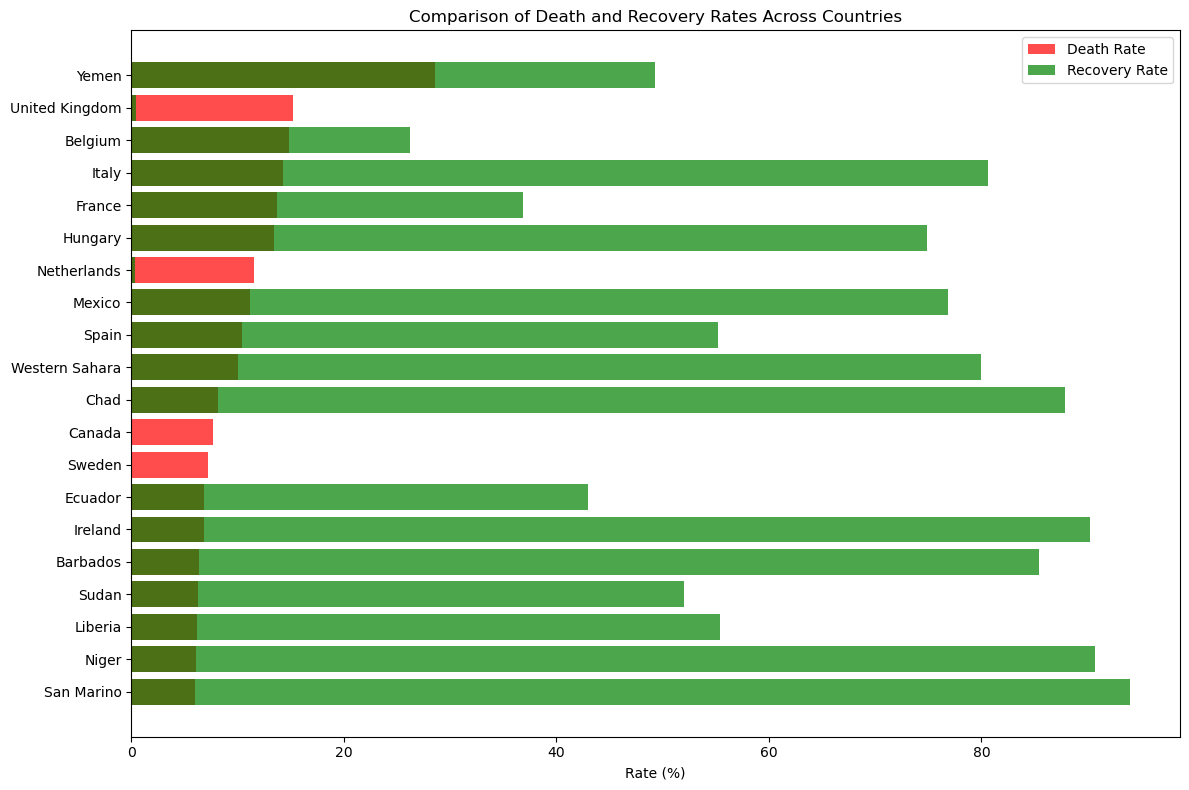

In [18]:
data_for_rates = data[['Country/Region', 'Deaths / 100 Cases', 'Recovered / 100 Cases']]

# Sorting data by death rate for better visualization
sorted_data = data_for_rates.sort_values(by='Deaths / 100 Cases', ascending=False)

# Selecting top N countries
top_countries = 20
top_sorted_data = sorted_data.head(top_countries)

# Plotting death and recovery rates for top countries
plt.figure(figsize=(12, 8))

plt.barh(top_sorted_data['Country/Region'], top_sorted_data['Deaths / 100 Cases'], color='red', alpha=0.7, label='Death Rate')
plt.barh(top_sorted_data['Country/Region'], top_sorted_data['Recovered / 100 Cases'], color='green', alpha=0.7, label='Recovery Rate')

plt.xlabel('Rate (%)')
plt.title('Comparison of Death and Recovery Rates Across Countries')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display highest rate at the top
plt.tight_layout()

plt.show()

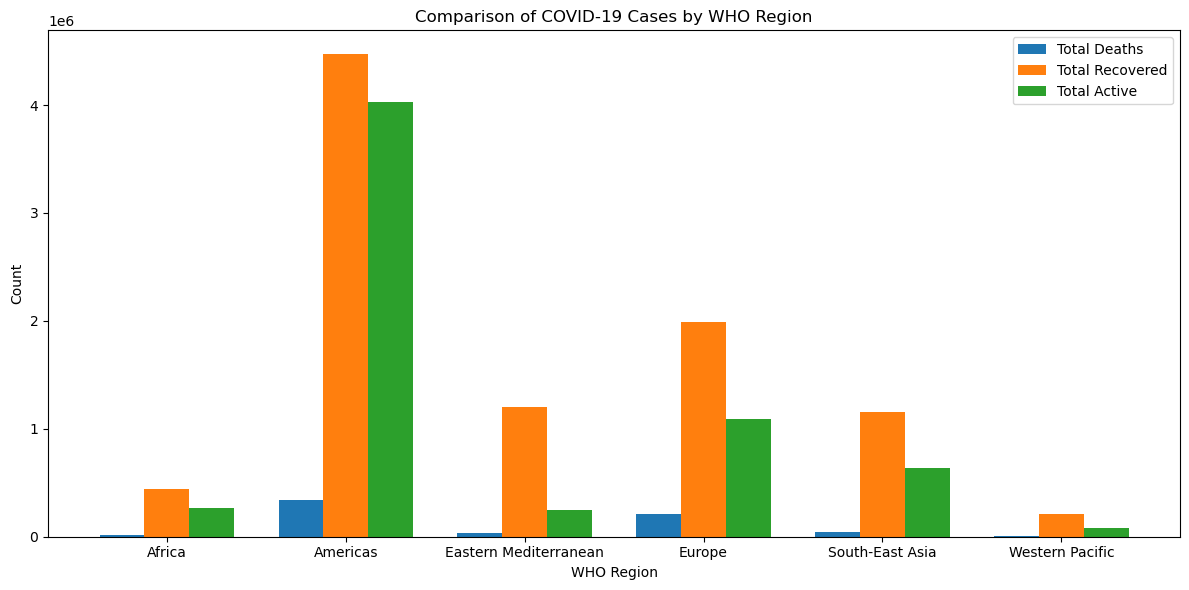

In [19]:
# Grouping data by WHO Region and calculating totals
grouped_data = data.groupby('WHO Region').agg({
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

# Plotting the comparison using a grouped bar chart
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = grouped_data.index

plt.bar(index, grouped_data['Deaths'], bar_width, label='Total Deaths')
plt.bar(index + bar_width, grouped_data['Recovered'], bar_width, label='Total Recovered')
plt.bar(index + 2 * bar_width, grouped_data['Active'], bar_width, label='Total Active')

plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.title('Comparison of COVID-19 Cases by WHO Region')
plt.xticks(index + bar_width, grouped_data['WHO Region'])
plt.legend()

plt.tight_layout()
plt.show()

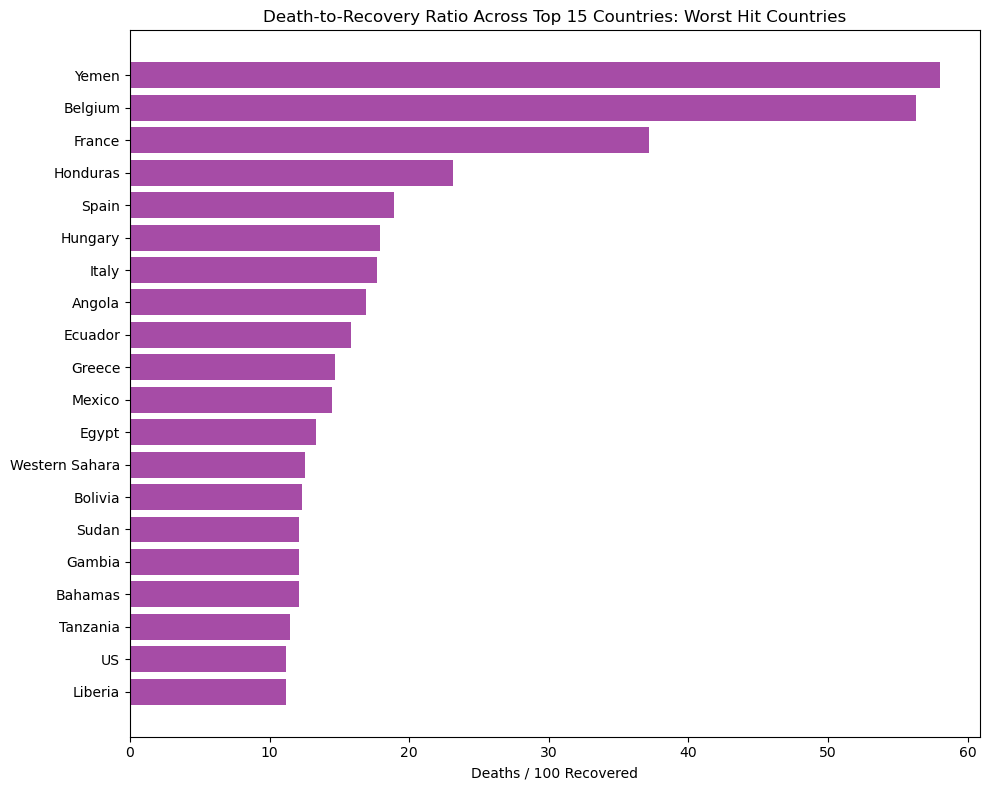

In [20]:
# Extract necessary columns for analysis
data_for_ratio = data[['Country/Region', 'Deaths / 100 Recovered']]

# Sorting data by death-to-recovery ratio for better visualization
sorted_data = data_for_ratio.sort_values(by='Deaths / 100 Recovered', ascending=False)

top_countries = 20
top_sorted_data = sorted_data.head(top_countries)

# Plotting death-to-recovery ratio for top countries
plt.figure(figsize=(10, 8))

plt.barh(top_sorted_data['Country/Region'], top_sorted_data['Deaths / 100 Recovered'], color='purple', alpha=0.7)
plt.xlabel('Deaths / 100 Recovered')
plt.title('Death-to-Recovery Ratio Across Top 15 Countries: Worst Hit Countries')
plt.gca().invert_yaxis()  # Invert y-axis to display highest ratio at the top
plt.tight_layout()

plt.show()

In [22]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 15.6 MB/s eta 0:00:00
     --------------------------------------- 22.9/22.9 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 18.3 MB/s eta 0:00:00


C:\Users\EQ2040AU\AppData\Local\Temp\ipykernel_18772\4215435752.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


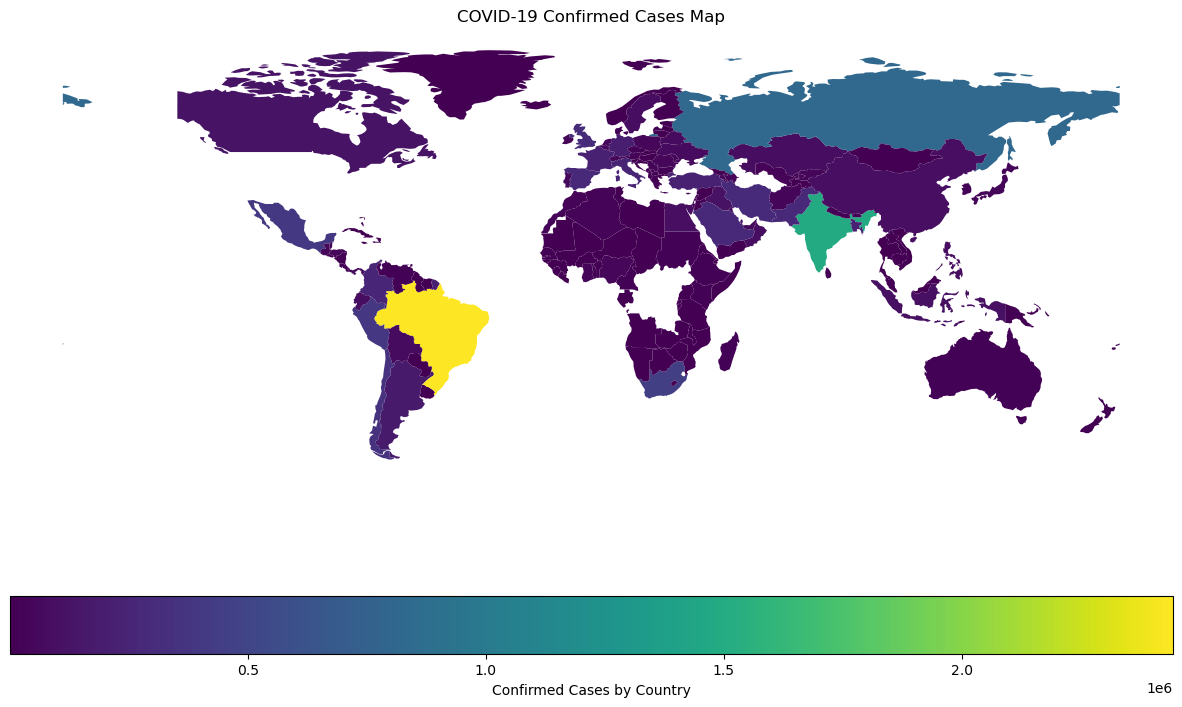

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map geometry with COVID-19 data based on the country name
merged_data = world.merge(data, how='left', left_on='name', right_on='Country/Region')

# Select the necessary columns for visualization
visualization_column = 'Confirmed'

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged_data.plot(column=visualization_column, ax=ax, legend=True,
                 legend_kwds={'label': f"{visualization_column} Cases by Country", 'orientation': "horizontal"})

plt.title(f"COVID-19 {visualization_column} Cases Map")
plt.axis('off')  # Turn off axis

plt.show()


I worked on preprocessing the dataset and then utilized it to build visulaizations for gathering useful insights. I also created a dashboard using the cleaned dataset on Tableau.

Link: https://public.tableau.com/views/CountrywiseCovid-19StarterAnalytics/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link

## Learning Using Tableau

1. Data Connection: working with different data sources on Tableau such as .csv files and Excel.

2. Dimensions vs Measures: Dimensions represent categorical data with discrete values used for grouping and slicing data whereas measures are quantitative data used for calculations, aggregations and numeric inputs in the graph.

3. Visualization Types: exploring various chart types such as bar charts, geo maps, and pie charts. I struggled to create a pie-chard with 3 measure values to display the distribution of total cases. Despite building a successful pie chart, it still wasn't showing the pie angles proportioanlly equal to the distribution.

4. Calculated fileds: Using calculated fields for statistical calculations to extract insights for in-depth visualizations.

5. Filters: Using filters for data manipulation, creating better graphs, and increasing interactivity.